In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('NG_22dec.csv')

C:\Users\Bhawit Balodi\AppData\Local\Temp\ipykernel_9732\2437384017.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('NG_22dec.csv')


In [3]:
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C
0,0.5,3.94214,1.24797,0.00000
1,1.0,3.94504,1.24789,0.81737
2,2.0,3.94806,1.24790,2.16510
3,3.0,3.95068,1.24790,3.33812
4,4.0,3.95281,1.24790,4.67338


In [4]:
df.isnull().sum()

Time/sec       0
Potential/V    0
Current/A      0
Charge/C       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Time/sec     1048571 non-null  object 
 1   Potential/V  1048571 non-null  float64
 2   Current/A    1048571 non-null  float64
 3   Charge/C     1048571 non-null  float64
dtypes: float64(3), object(1)
memory usage: 32.0+ MB


In [6]:
df.shape

(1048571, 4)

In [7]:
df.loc[df['Time/sec']=='######.#']  # checking for the string values 

,Time/sec,Potential/V,Current/A,Charge/C
994879,######.#,4.17935,0.00000,2964.880
994880,######.#,4.17936,0.00000,2964.880
994881,######.#,4.17934,0.00000,2964.880
994882,######.#,4.17935,0.00000,2964.880
994883,######.#,4.17934,0.00000,2964.880
...,...,...,...,...
1048566,######.#,3.99802,1.24720,-335.933
1048567,######.#,3.99817,1.24720,-334.761
1048568,######.#,3.99830,1.24719,-333.588
1048569,######.#,3.99844,1.24719,-332.242


In [8]:
df.rename(columns={'Time/sec': 'Time', 'Potential/V': 'Potential','Current/A': 'Current','Charge/C': 'Charge'}, inplace=True)

In [9]:
df.drop(df.index[994879:1048571],axis = 0, inplace = True)   # Removing the #### values 

In [10]:
df.insert(loc=3, column='Capacity', value = df['Charge']/3600)  # Adding the column

In [11]:
df.insert(loc=4,column='SOC',value = df['Capacity']/0.96)

In [12]:
df['Time'] = df['Time'].astype(float)  # converting object values to float values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   SOC        994879 non-null  float64
 5   Charge     994879 non-null  float64
dtypes: float64(6)
memory usage: 45.5 MB


Text(0.5, 1.0, 'Capacity vs TIme')

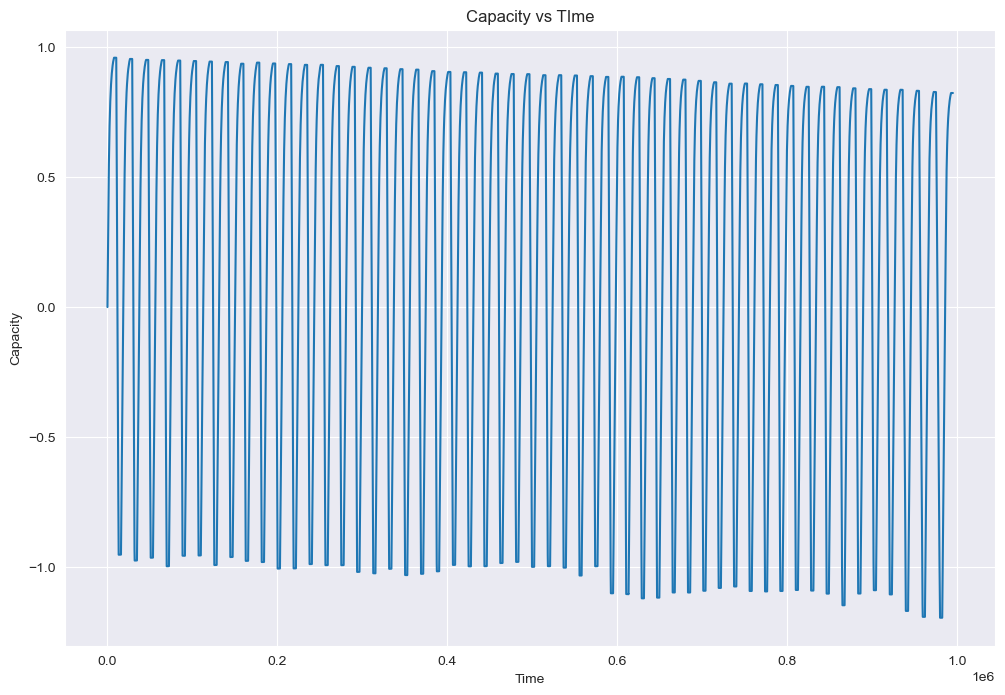

In [14]:
# Capacity Vs Time
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(df['Capacity'])
plt.ylabel('Capacity')
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Time')
plt.title('Capacity vs TIme')

# Raw SOC

CPU times: total: 3min 37s
Wall time: 3min 42s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

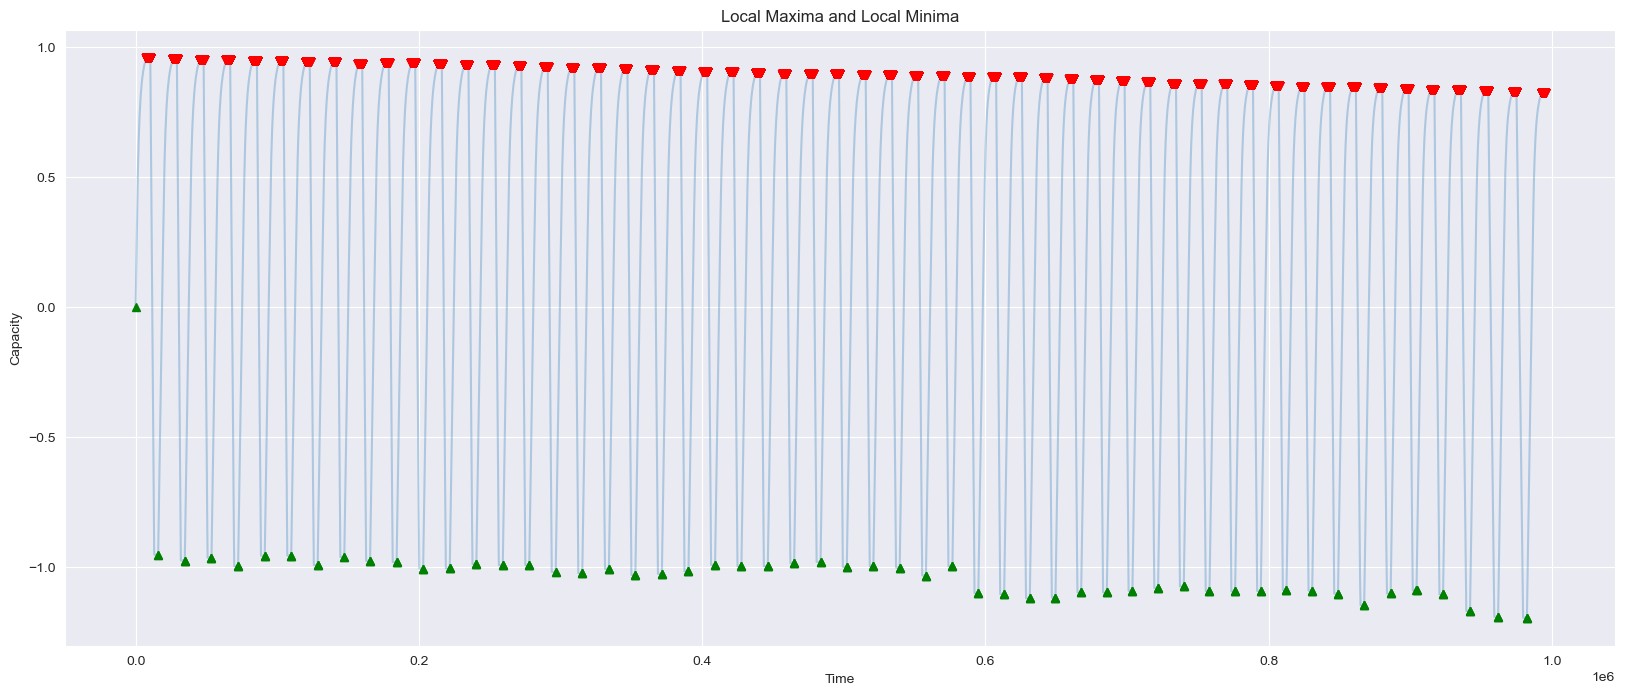

In [15]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(df.Capacity.values, np.less_equal, order=5000)[0]
ilocs_max = argrelextrema(df.Capacity.values, np.greater_equal, order=5000)[0]

df.Capacity.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
df.iloc[ilocs_max].Capacity.plot(style='.', lw=1, color='red', marker="v");
df.iloc[ilocs_min].Capacity.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [16]:
raw_maximum_point = df['Capacity'][ilocs_max].unique()
raw_minimum_point = df['Capacity'][ilocs_min].unique()

In [17]:
print(raw_maximum_point)
print('Maximum Point is - ',raw_maximum_point.max())

[0.95931944 0.95455    0.95088889 0.95006389 0.94838889 0.94654722
 0.94444722 0.94270278 0.93617778 0.940475   0.93714722 0.93475278
 0.93185278 0.93199444 0.92716944 0.92424722 0.92075278 0.91866944
 0.91525    0.91343333 0.90770833 0.90459167 0.90346111 0.90203333
 0.89824167 0.896575   0.89607222 0.89202222 0.89213611 0.89085556
 0.88832778 0.88545556 0.88612778 0.8842     0.88057778 0.87751389
 0.87505278 0.87025556 0.8649     0.85945    0.85999167 0.85715833
 0.85434444 0.85090833 0.84737222 0.84766667 0.84604444 0.84154444
 0.83846389 0.83609722 0.83606667 0.83217778 0.82765556 0.82357778]
Maximum Point is -  0.9593194444444445


Text(0.5, 1.0, 'Dataset')

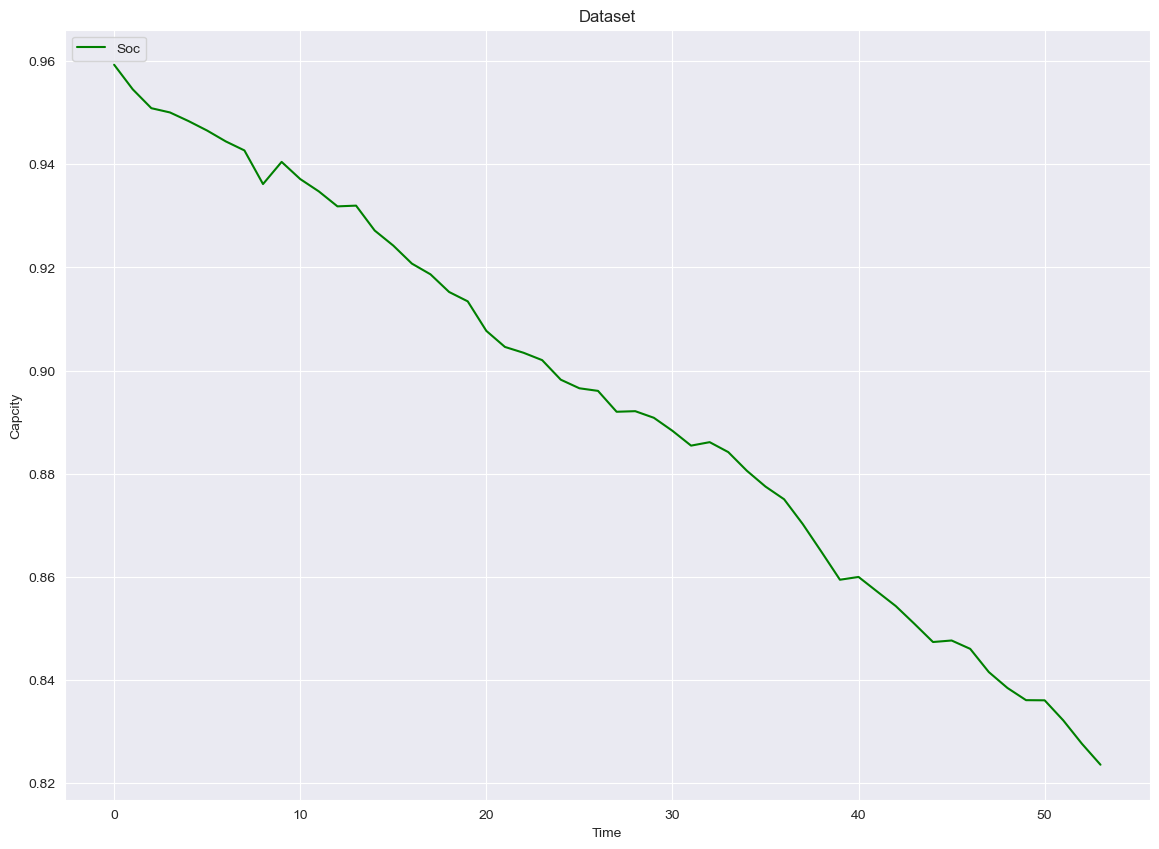

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
plt.plot(raw_maximum_point,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# Data Cleaning

In [19]:
df.isnull().sum()

Time         0
Potential    0
Current      0
Capacity     0
SOC          0
Charge       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   SOC        994879 non-null  float64
 5   Charge     994879 non-null  float64
dtypes: float64(6)
memory usage: 45.5 MB


In [21]:
Capacity = df['Capacity']

# Modeling

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Capacity'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [23]:
df.head()

,Time,Potential,Current,Capacity,SOC,Charge
0,0.000000e+00,0.822158,0.969868,0.554717,0.000000,0.00000
1,5.000005e-07,0.824159,0.969847,0.554823,0.000237,0.81737
2,1.500001e-06,0.826242,0.969850,0.554996,0.000626,2.16510
3,2.500002e-06,0.828049,0.969850,0.555148,0.000966,3.33812
4,3.500003e-06,0.829519,0.969850,0.555320,0.001352,4.67338


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994879 entries, 0 to 994878
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       994879 non-null  float64
 1   Potential  994879 non-null  float64
 2   Current    994879 non-null  float64
 3   Capacity   994879 non-null  float64
 4   SOC        994879 non-null  float64
 5   Charge     994879 non-null  float64
dtypes: float64(6)
memory usage: 45.5 MB


In [25]:
charge = df.pop('Charge')
capacity = df.pop('Capacity')
Y = df.pop('SOC')
X = df

In [26]:
X.head(5)

,Time,Potential,Current
0,0.000000e+00,0.822158,0.969868
1,5.000005e-07,0.824159,0.969847
2,1.500001e-06,0.826242,0.969850
3,2.500002e-06,0.828049,0.969850
4,3.500003e-06,0.829519,0.969850


In [27]:
Y.head(5)

0    0.000000
1    0.000237
2    0.000626
3    0.000966
4    0.001352
Name: SOC, dtype: float64

# Load pretrained model

## Model 4

In [28]:
import tensorflow as tf

In [29]:
model_4 = tf.keras.models.load_model('D:\IIT Delhi\Dataset_B2_dec\Saved_models\model_4_SOCesti.h5')

# Show the model architecture
model_4.summary() 

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 100)               400       
                                                                 
 dense_63 (Dense)            (None, 100)               10100     
                                                                 
 dense_64 (Dense)            (None, 50)                5050      
                                                                 
 dense_65 (Dense)            (None, 50)                2550      
                                                                 
 dense_66 (Dense)            (None, 50)                2550      
                                                                 
 dense_67 (Dense)            (None, 50)                2550      
                                                                 
 dense_68 (Dense)            (None, 10)              

In [30]:
model_4.evaluate(X,Y)

31090/31090 [==============================] - 30s 964us/step - loss: 0.0113 - rmse: 0.0242 - mae: 0.0113 - mse: 5.8603e-04 - mape: 291.8630


[0.011342747136950493,
 0.024208156391978264,
 0.011342747136950493,
 0.0005860348464921117,
 291.86297607421875]

In [31]:
Y_pred_4 = model_4.predict(X)

31090/31090 [==============================] - 24s 780us/step


In [61]:
Y_pred_4

array([[-0.27781034],
       [-0.26642472],
       [-0.2547666 ],
       ...,
       [ 0.8574851 ],
       [ 0.8574695 ],
       [ 0.8574696 ]], dtype=float32)

In [62]:
example = Y_pred_4

array([[-0.27781034],
       [-0.26642472],
       [-0.2547666 ],
       ...,
       [ 0.8574851 ],
       [ 0.8574695 ],
       [ 0.8574696 ]], dtype=float32)

In [64]:
example_1 = np.squeeze(example)
example_1

array([-0.27781034, -0.26642472, -0.2547666 , ...,  0.8574851 ,
        0.8574695 ,  0.8574696 ], dtype=float32)

# Model 7

In [32]:
model_7 = tf.keras.models.load_model('D:\IIT Delhi\Dataset_B2_dec\Saved_models\model_7_SOCesti.h5')

# Show the model architecture
model_7.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 30)             3840      
                                                                 
 lstm_5 (LSTM)               (None, 10)                1640      
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_7.evaluate(X,Y)

31090/31090 [==============================] - 44s 1ms/step - loss: 0.0208 - rmse: 0.0421 - mae: 0.0208 - mse: 0.0018 - mape: 345.9491


[0.020838970318436623,
 0.04205121845006943,
 0.020838970318436623,
 0.001768304849974811,
 345.9490966796875]

In [34]:
Y_pred_7 = model_7.predict(X)

31090/31090 [==============================] - 41s 1ms/step


In [65]:
example_2 = np.squeeze(Y_pred_7)
example_2

array([-0.3080296 , -0.29740503, -0.28643942, ...,  0.83370847,
        0.8336943 ,  0.8336947 ], dtype=float32)

# Model 10

In [35]:
model_10 = tf.keras.models.load_model('D:\IIT Delhi\Dataset_B2_dec\Saved_models\model_10_SOCesti.h5')

# Show the model architecture
model_10.summary() 

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 2, 20)             60        
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 20)             820       
                                                                 
 flatten_5 (Flatten)         (None, 20)                0         
                                                                 
 dense_85 (Dense)            (None, 20)                420       
                                                                 
 dense_86 (Dense)            (None, 10)                210       
                                                                 
 dense_87 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-train

In [36]:
model_10.evaluate(X,Y)

31090/31090 [==============================] - 30s 971us/step - loss: 0.0247 - rmse: 0.0441 - mae: 0.0247 - mse: 0.0019 - mape: 393.0285


[0.02466108649969101,
 0.04408242926001549,
 0.02466108649969101,
 0.0019432605477049947,
 393.0284729003906]

In [37]:
Y_pred_10 = model_10.predict(X)

31090/31090 [==============================] - 24s 766us/step


In [38]:
print(Y_pred_10)

[[-0.32073298]
 [-0.31013778]
 [-0.29918972]
 ...
 [ 0.84631324]
 [ 0.8463011 ]
 [ 0.8463009 ]]


In [66]:
example_3 = np.squeeze(Y_pred_10)
example_3

array([-0.32073298, -0.31013778, -0.29918972, ...,  0.84631324,
        0.8463011 ,  0.8463009 ], dtype=float32)

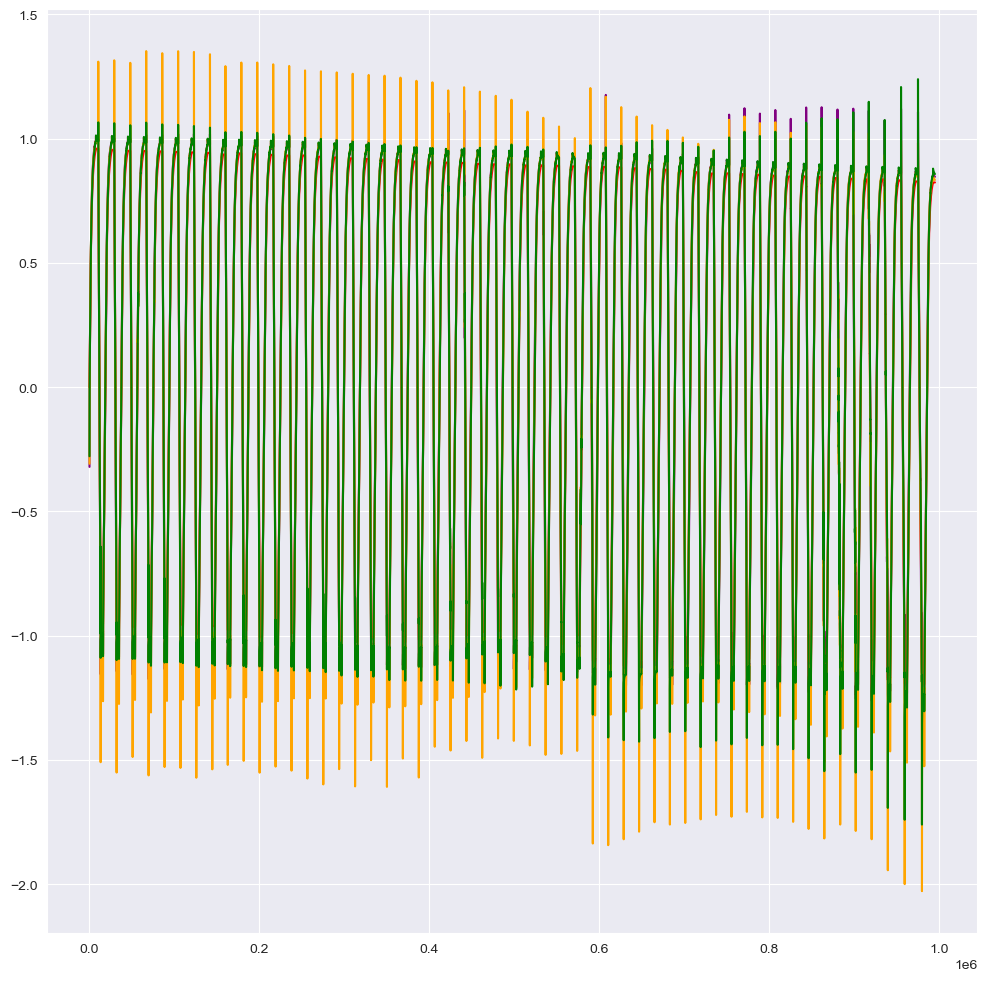

In [67]:
plt.figure(figsize=(12,12))
plt.plot(Y_pred_10,color='purple')
plt.plot(Capacity,color='red')
plt.plot(Y_pred_7,color='orange')
plt.plot(Y_pred_4,color='green')

# Dataset of pred values

In [69]:
final_results = {'Raw':Capacity.tolist(), 'NN': example_1.tolist(), 'LSTM': example_2.tolist(),'CNN': example_3.tolist()}
prediction_data_1 = pd.DataFrame(final_results)

In [70]:
prediction_data_1

,Raw,NN,LSTM,CNN
0,0.000000,-0.277810,-0.308030,-0.320733
1,0.000227,-0.266425,-0.297405,-0.310138
2,0.000601,-0.254767,-0.286439,-0.299190
3,0.000927,-0.244784,-0.276963,-0.289712
4,0.001298,-0.236764,-0.269289,-0.282027
...,...,...,...,...
994874,0.823578,0.857486,0.833709,0.846314
994875,0.823578,0.857485,0.833707,0.846314
994876,0.823578,0.857485,0.833708,0.846313
994877,0.823578,0.857469,0.833694,0.846301


In [74]:
prediction_data_1.to_csv('prediction_data.csv')

# Model 3 Pred values analysis

CPU times: total: 8min 35s
Wall time: 8min 42s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

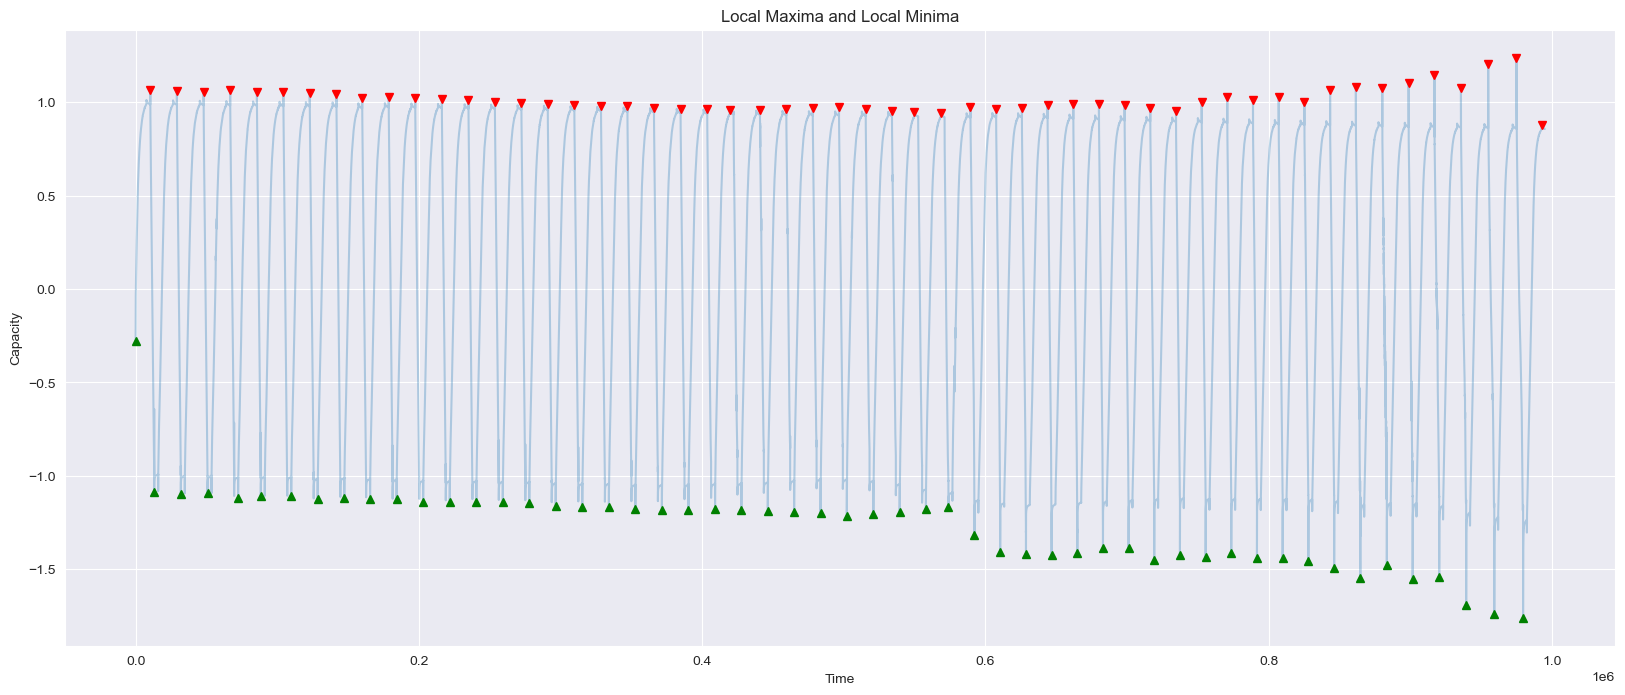

In [86]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(prediction_data_1.NN.values, np.less_equal, order=10000)[0]
ilocs_max = argrelextrema(prediction_data_1.NN.values, np.greater_equal, order=10000)[0]

prediction_data_1.NN.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
prediction_data_1.iloc[ilocs_max].NN.plot(style='.', lw=1, color='red', marker="v");
prediction_data_1.iloc[ilocs_min].NN.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [87]:
maximum_point_NN =  prediction_data_1['NN'][ilocs_max].unique()
minimum_point_NN = prediction_data_1['NN'][ilocs_min].unique()

In [88]:
print(maximum_point)
print('Maximum Point is - ',maximum_point_NN.max())

NameError: name 'maximum_point' is not defined

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
# plt.plot(df['SOC'],color='orange')
plt.plot(maximum_point_NN,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# LSTM SOC

CPU times: total: 7min 49s
Wall time: 7min 56s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

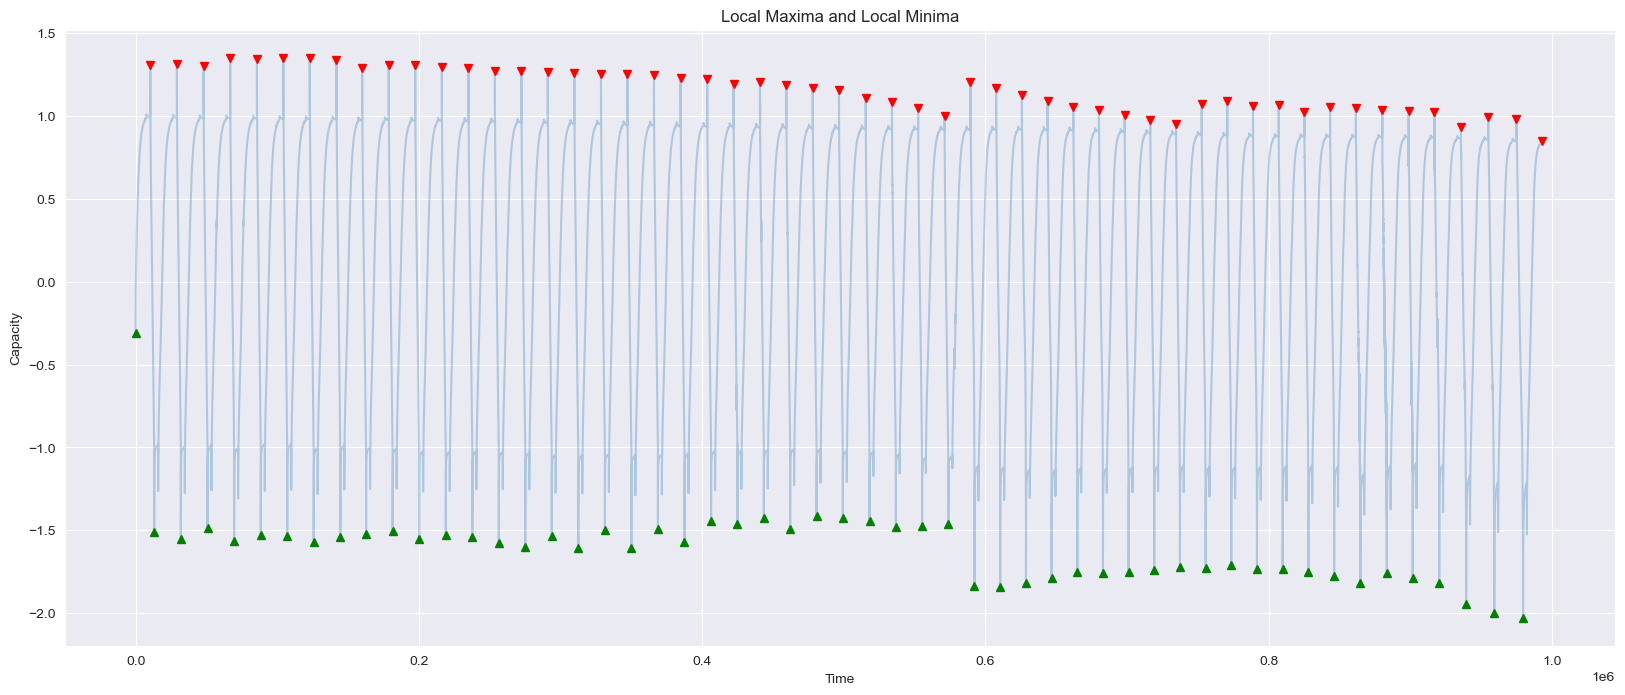

In [75]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(prediction_data_1.LSTM.values, np.less_equal, order=10000)[0]
ilocs_max = argrelextrema(prediction_data_1.LSTM.values, np.greater_equal, order=10000)[0]

prediction_data_1.LSTM.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
prediction_data_1.iloc[ilocs_max].LSTM.plot(style='.', lw=1, color='red', marker="v");
prediction_data_1.iloc[ilocs_min].LSTM.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [79]:
maximum_point_lstm = prediction_data_1['LSTM'][ilocs_max].unique()
minimum_point_lstm = prediction_data_1['LSTM'][ilocs_min].unique()

In [80]:
print(maximum_point_lstm)
print('Maximum Point is - ',maximum_point_lstm.max())

[1.30942643 1.31496906 1.30485308 1.35192049 1.34354985 1.35154164
 1.34854722 1.33927131 1.29141843 1.3058815  1.30597949 1.29880261
 1.29217446 1.2742312  1.27072489 1.26626158 1.26086617 1.25592947
 1.25302899 1.24518847 1.23250568 1.22640872 1.19392955 1.20660734
 1.18896484 1.17215526 1.15636098 1.10840595 1.08377898 1.04859304
 1.00199854 1.20328641 1.16827595 1.12652373 1.08864951 1.05398715
 1.03507531 1.00471711 0.97908151 0.95498681 1.07567465 1.08910871
 1.06243598 1.0658145  1.0234983  1.05584598 1.04647934 1.03359926
 1.02777779 1.02214241 0.93471438 0.99206972 0.9823494  0.85112864]
Maximum Point is -  1.351920485496521


Text(0.5, 1.0, 'Dataset')

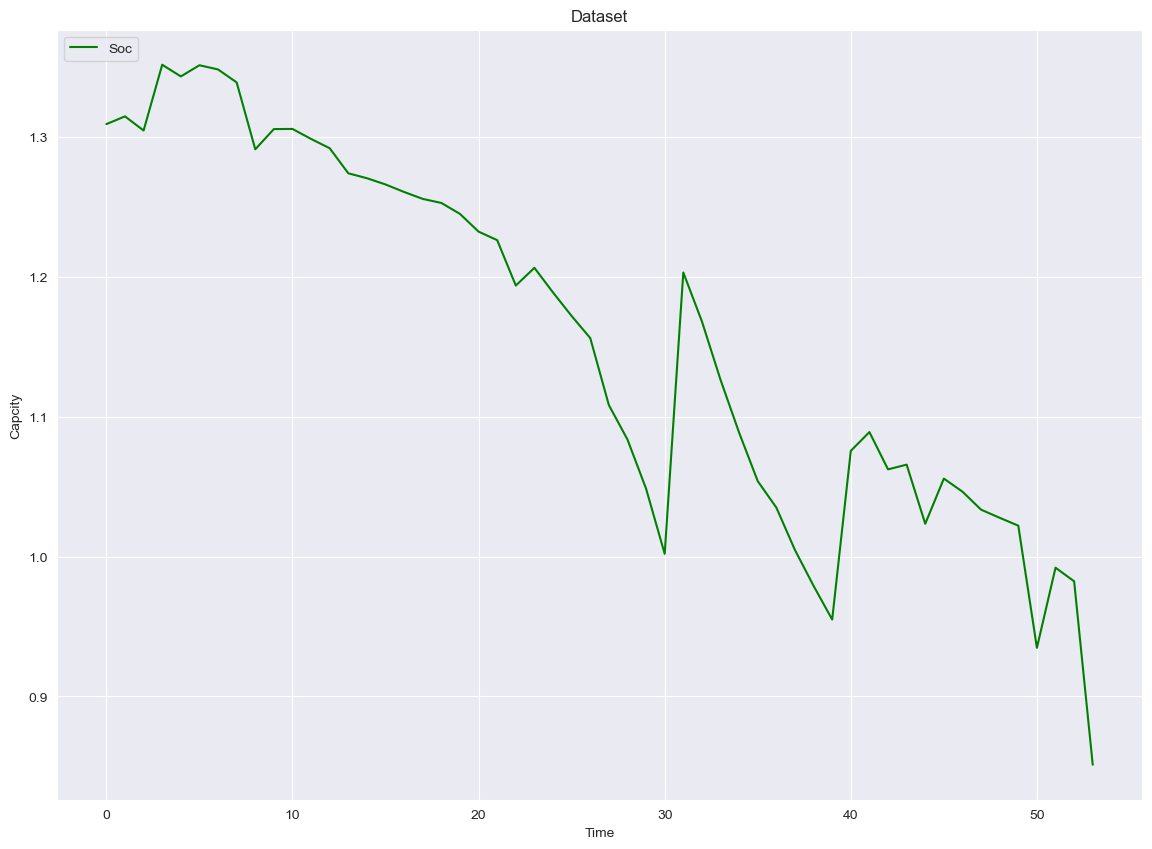

In [81]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(maximum_point_lstm,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# CNN SOC

CPU times: total: 7min 25s
Wall time: 7min 29s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

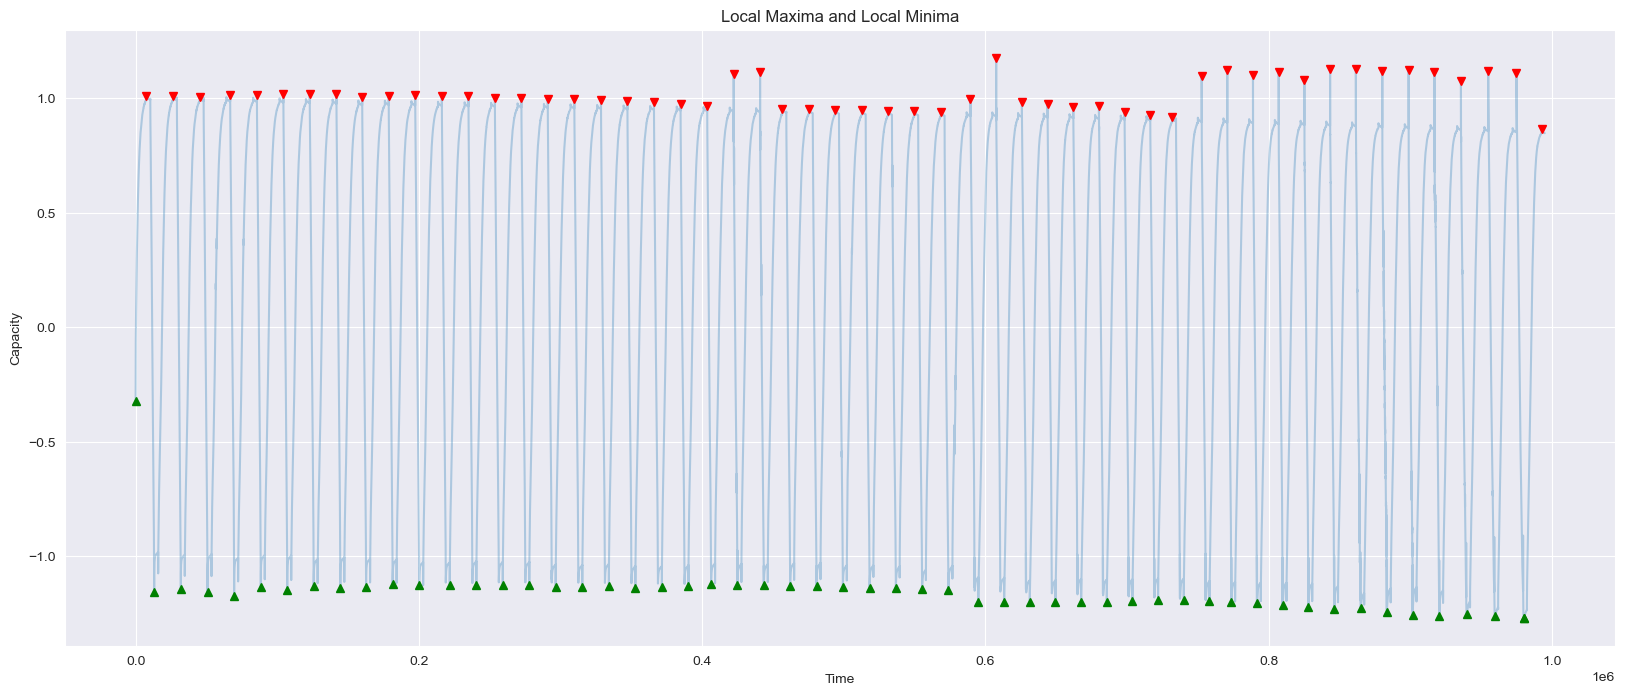

In [82]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(prediction_data_1.CNN.values, np.less_equal, order=10000)[0]
ilocs_max = argrelextrema(prediction_data_1.CNN.values, np.greater_equal, order=10000)[0]

prediction_data_1.CNN.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
prediction_data_1.iloc[ilocs_max].CNN.plot(style='.', lw=1, color='red', marker="v");
prediction_data_1.iloc[ilocs_min].CNN.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [83]:
maximum_point_CNN = prediction_data_1['CNN'][ilocs_max].unique()
minimum_point_CNN = prediction_data_1['CNN'][ilocs_min].unique()

In [84]:
print(maximum_point_CNN)
print('Maximum Point is - ',maximum_point_lstm.max())

[1.01069498 1.00841296 1.00575483 1.01512825 1.01470554 1.01836991
 1.01902997 1.01794076 1.00509799 1.01029909 1.01130009 1.00965691
 1.00784385 1.00198245 1.00010026 0.99744207 0.99402767 0.99015027
 0.9862898  0.9804607  0.9719345  0.96562093 1.10314536 1.11400771
 0.95329195 0.95088619 0.94844145 0.94591922 0.94354504 0.94118547
 0.93868262 0.99387175 1.17567706 0.98221761 0.9721418  0.96040434
 0.96509749 0.93854272 0.92456889 0.9168846  1.09631824 1.12212336
 1.10053313 1.11493731 1.07950282 1.12516403 1.12617242 1.1169126
 1.12032759 1.11185896 1.07314467 1.1197902  1.10688269 0.86358279]
Maximum Point is -  1.351920485496521


Text(0.5, 1.0, 'Dataset')

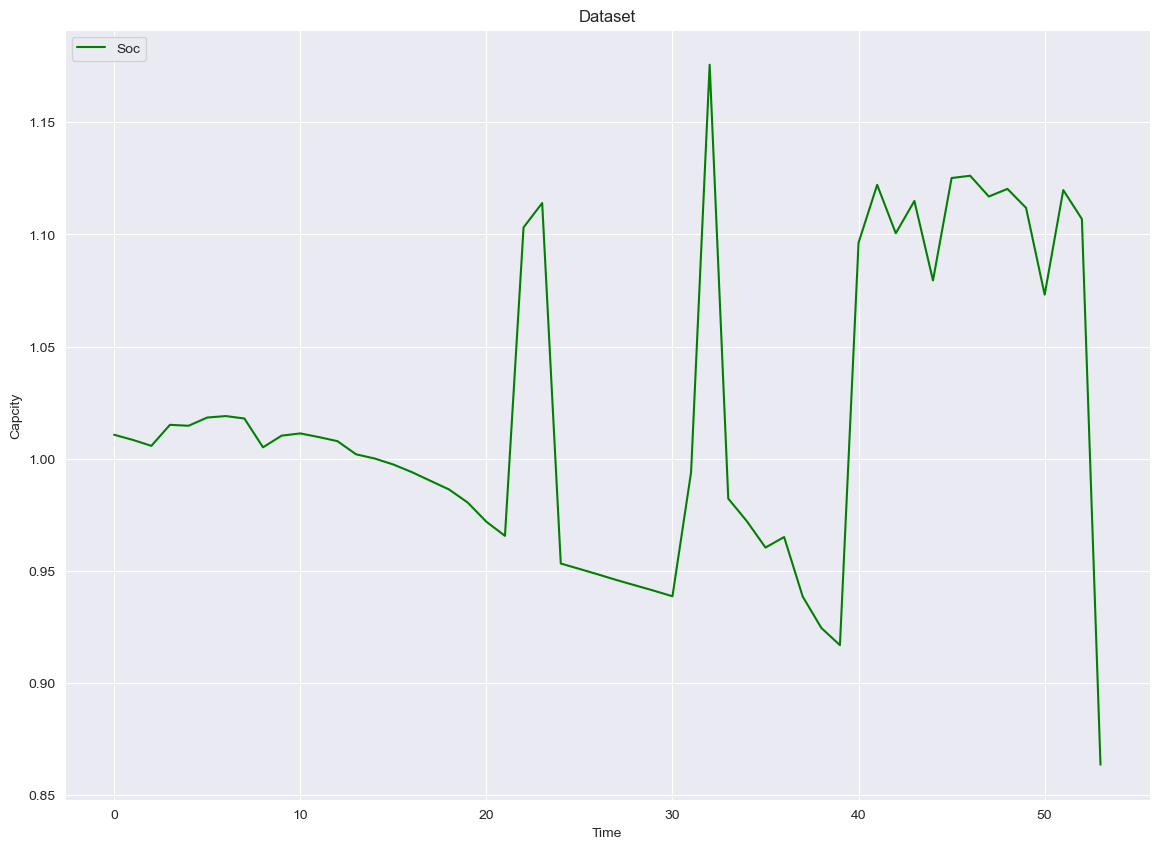

In [85]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(maximum_point_CNN,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# Baseline

CPU times: total: 7min 26s
Wall time: 7min 29s


C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)
C:\Users\Bhawit Balodi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:755: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


Text(0.5, 1.0, 'Local Maxima and Local Minima')

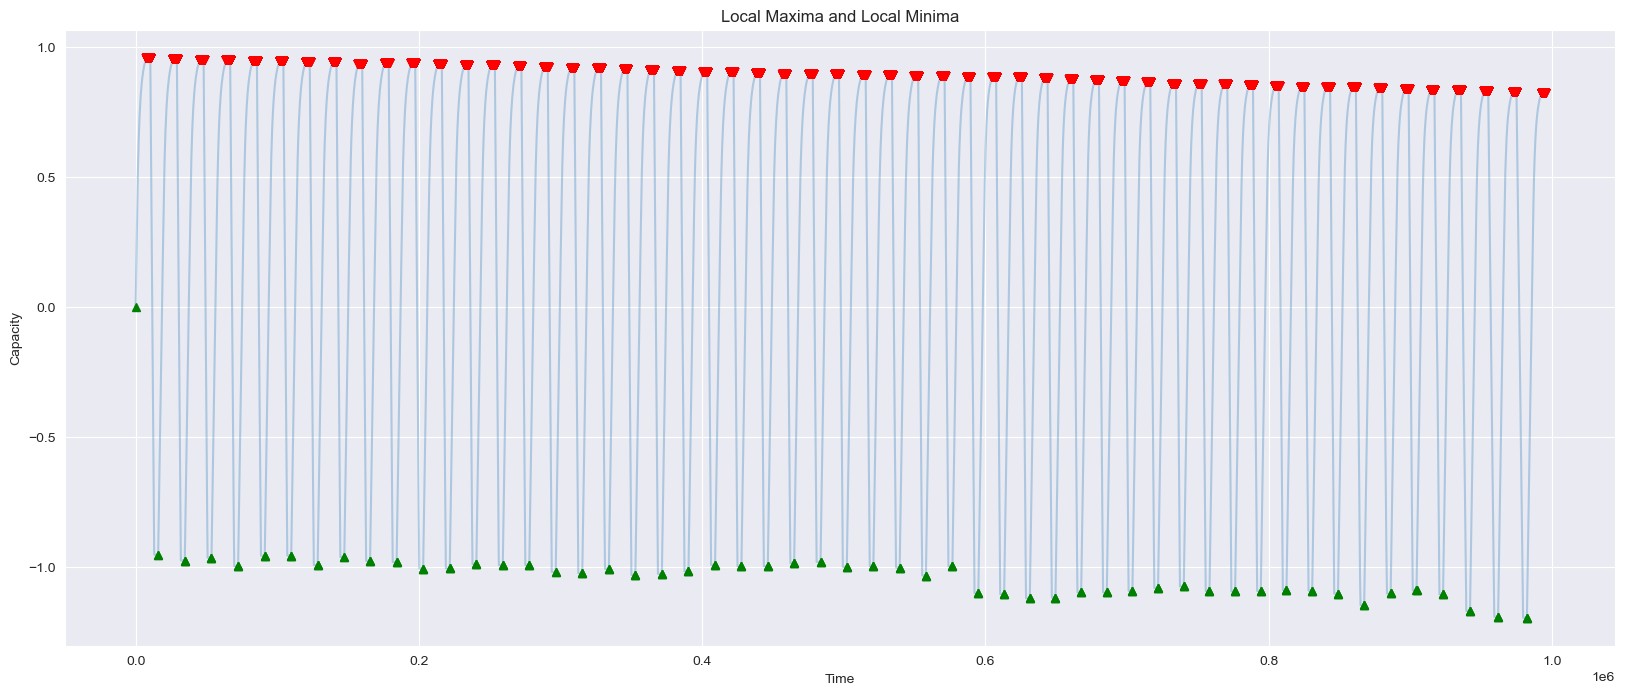

In [94]:
%%time
from scipy.signal import argrelextrema
import numpy as np

ilocs_min = argrelextrema(prediction_data_1.Raw.values, np.less_equal, order=10000)[0]
ilocs_max = argrelextrema(prediction_data_1.Raw.values, np.greater_equal, order=10000)[0]

prediction_data_1.Raw.plot(figsize=(20,8), alpha=.3)
# filter prices that are peaks and plot them differently to be visable on the plot
prediction_data_1.iloc[ilocs_max].Raw.plot(style='.', lw=1, color='red', marker="v");
prediction_data_1.iloc[ilocs_min].Raw.plot(style='.', lw=1, color='green', marker="^")
plt.ylabel("Capacity")
plt.xlabel("Time")
plt.title('Local Maxima and Local Minima')

In [95]:
maximum_point_baseline = prediction_data_1['Raw'][ilocs_max].unique()
minimum_point_baseline = prediction_data_1['Raw'][ilocs_min].unique()

In [96]:
print(maximum_point_baseline)
print('Maximum Point is - ',maximum_point_lstm.max())

[0.95931944 0.95455    0.95088889 0.95006389 0.94838889 0.94654722
 0.94444722 0.94270278 0.93617778 0.940475   0.93714722 0.93475278
 0.93185278 0.93199444 0.92716944 0.92424722 0.92075278 0.91866944
 0.91525    0.91343333 0.90770833 0.90459167 0.90346111 0.90203333
 0.89824167 0.896575   0.89607222 0.89202222 0.89213611 0.89085556
 0.88832778 0.88545556 0.88612778 0.8842     0.88057778 0.87751389
 0.87505278 0.87025556 0.8649     0.85945    0.85999167 0.85715833
 0.85434444 0.85090833 0.84737222 0.84766667 0.84604444 0.84154444
 0.83846389 0.83609722 0.83606667 0.83217778 0.82765556 0.82357778]
Maximum Point is -  1.351920485496521


Text(0.5, 1.0, 'Dataset')

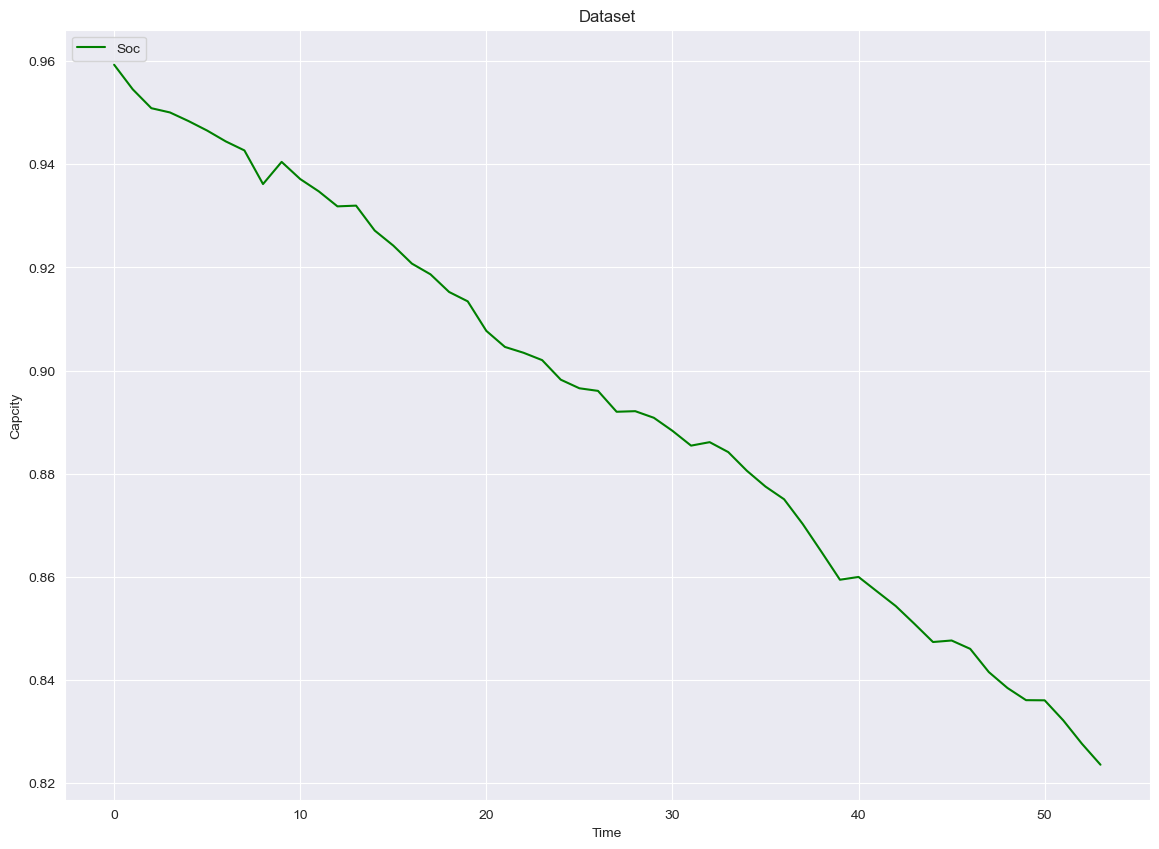

In [97]:
sns.set_style("darkgrid")
plt.figure(figsize=(14, 10))
plt.plot(maximum_point_baseline,color='green')
plt.ylabel('Capcity')
plt.xlabel('Time')
plt.legend(["Soc", "Integral current"], loc ="upper left")
plt.title('Dataset')

# Graphs

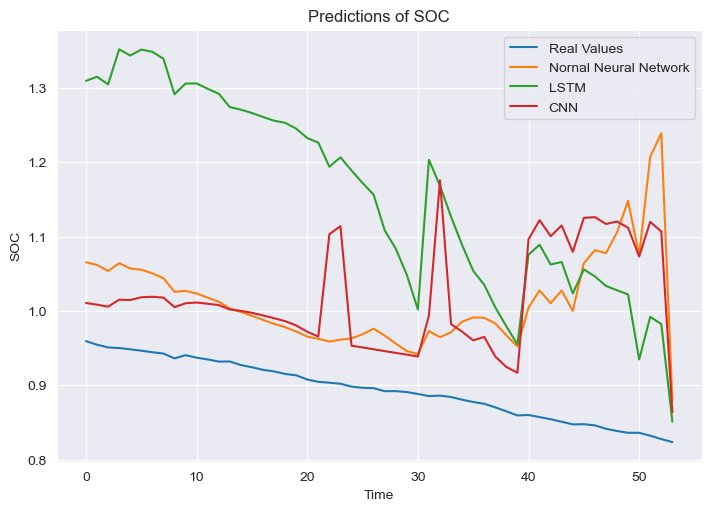

In [99]:
plt.figure(figsize=(7,5), layout='constrained')
plt.plot(raw_maximum_point, label='Real Values')  
plt.plot(maximum_point_NN, label='Nornal Neural Network') 
plt.plot(maximum_point_lstm, label='LSTM')
plt.plot(maximum_point_CNN, label='CNN')
plt.xlabel('Time')
plt.ylabel('SOC')
plt.title("Predictions of SOC")
plt.legend()